# ECE 471 Fall 2024 Mini Project 1: Safety Analysis of Autonomous Vehicle

## Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mp1_av_disengagements.csv') # read the csv file

In [3]:
df.head() # display the first few rows of the dataframe

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


## Task 3 – Probabilistic Analysis of AV Disengagement

### 3.1 Basic Probability

#### a. The assumption of at most one disengagement per mile allows us to treat the occurrence of a disengagement in a mile as a random variable with a _______ distribution

**Bernoulli** distribution

#### b. Based on the above assumptions, calculate the probability of disengagement per mile on a cloudy day.

In [4]:
prob_disengage_cloudy = (df['Weather'] == 'cloudy').sum() / (505229 * 0.28) # calculate the probability of disengagement per mile on a cloudy day
print(f"The probability of disengagement per mile on a cloudy day is: {prob_disengage_cloudy:.5f}")

The probability of disengagement per mile on a cloudy day is: 0.00590


#### c. Based on the above assumptions, calculate the probability of disengagement per mile on a clear day.

In [5]:
prob_disengage_clear = (df['Weather'] == 'clear').sum() / (505229 * 0.72)  # calculate the probability of disengagement per mile on a clear day
print(f"The probability of disengagement per mile on a clear day is: {prob_disengage_clear:.5f}")

The probability of disengagement per mile on a clear day is: 0.00052


#### d. Similarly, calculate the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day.

For *cloudy* day:

In [6]:
prob_disengage_cloudy_auto = df[(df['Weather'] == 'cloudy') & (df['TypeOfTrigger'] == 'automatic')].shape[0] / (505229 * 0.28) # calculate the probability of an automatic disengagement per mile on a cloudy day
print(f"The probability of an automatic disengagement per mile on a cloudy day is: {prob_disengage_cloudy_auto:.5f}")

The probability of an automatic disengagement per mile on a cloudy day is: 0.00281


For *clear* day:

In [7]:
prob_disengage_clear_auto = df[(df['Weather'] == 'clear') & (df['TypeOfTrigger'] == 'automatic')].shape[0] / (505229 * 0.72) # calculate the probability of an automatic disengagement per mile on a clear day
print(f"The probability of an automatic disengagement per mile on a clear day is: {prob_disengage_clear_auto:.5f}")

The probability of an automatic disengagement per mile on a clear day is: 0.00026


#### e. How likely is it that there are 100 or more disengagements in 10,000 miles under cloudy conditions?  (**hint**: use Central Limit Theorem)

To find the likelihood of > 100 disengagements in 10,000 miles under cloudy conditions, we use central limit theorem to approximate the distribution of the number of disengagements over 10,000 miles as a normal distribution.

In this case:
- $\mu = np$
- $\sigma = \sqrt{np(1-p)}$

In [8]:
n = 10000

mu = n * prob_disengage_cloudy
sigma = (n * prob_disengage_cloudy * (1 - prob_disengage_cloudy)) ** 0.5

prob_100_more_disengage_cloudy = 1 - stats.norm.cdf(100, mu, sigma)
print(f"The likelihood of having 100 or more disengagements in 10000 miles under cloudy conditions is: {prob_100_more_disengage_cloudy:.5f}")

The likelihood of having 100 or more disengagements in 10000 miles under cloudy conditions is: 0.00000


Therefore, from the calculation, we observe that having 100 or more disengagements in 10,000 miles under cloudy conditions is almost impossible.

### 3.2 Under the assumption in Task 3.1.a and given the weather condition is cloudy.

#### a. What is the distribution of “the number of miles until the next disengagement”? Explain your reasoning. Calculate and state the values of the parameters of the distribution. 

"The number of miles until next disengagement" will follow a **Geometric** distribution, since the geometric distribution models the number of trials (miles) to get the first success (disengagement).

- The expectation $E(X)$ of a Geometric distribution is: $E(X)=\frac{1}{p}$.
- The variance $Var(X)$ of a Geometric distribution is: $Var(X) = \frac{1-p}{p^2}$

In [9]:
geometric_mu = 1 / prob_disengage_cloudy
geometric_var = (1 - prob_disengage_cloudy) / (prob_disengage_cloudy ** 2)

print(f"The mean number of disengagements per mile on cloudy days is: {geometric_mu:.5f}")
print(f"The variance of the number of disengagements per mile on cloudy days is: {geometric_var:.5f}")

The mean number of disengagements per mile on cloudy days is: 169.41811
The variance of the number of disengagements per mile on cloudy days is: 28533.07714


Therefore, denotes "The number of miles until next disengagement" as $X$, $X$ ~ $geom(p=0.0059)$. And it has mean $E(X)=169.418$, variance $Var(X)=28533.078$

#### b. What is the distribution of “the number of disengagements in 10,000 miles”? (hint: this is equivalent to drawing n=10,000 independent trials from the distribution of disengagement per mile you calculated from Task 3.1.a). Calculate and state the values of the parameters of the distribution.

Binomial distribution. $n = 10000$, $p = 0.00590$

The number of disengagements are $10000$, this means that there are $10000$ trials in this distribution, and each mile are independent, it has only two result: disengagement or no disengagement. According to these, this is Binomial distribution.

In [10]:
n = 10000

binomial_mu = n * prob_disengage_cloudy
binomial_var = n * prob_disengage_cloudy * (1 - prob_disengage_cloudy)

print(f"The mean number of disengagements in 10000 miles on cloudy days is: {binomial_mu:.5f}")
print(f"The variance of the number of disengagements in 10000 miles on cloudy days is: {binomial_var:.5f}")

The mean number of disengagements in 10000 miles on cloudy days is: 59.02557
The variance of the number of disengagements in 10000 miles on cloudy days is: 58.67717


Therefore, denotes "The number of disengagements are $10000$" as $Y$, $Y$ ~ $binomial(n=10000, p=0.0059)$. And it has mean $E(Y)=59.03$, variance $Var(Y)=58.68$

#### c. Notice that the number of disengagements "$n$" in Task 3.2.b is large while the probability of disengagement per mile "$p$" is very small, what distribution does your answer in Task 3.2.b approximate? Calculate and state the values of the parameters of the distribution.

The Binomial distribution we found in Task 3.2.b can be approximated by a **Poisson** distribution, since the Poisson distribution is often used as an approximation to the Binomial distribution under the condition that $n$ is large and $p$ is small. Also, in Homework 0, we have derived that as $n$ goes infinity, Poisson distribution can be derived from Binomial distribution.

The parameter $\lambda$ in this case, is $\lambda = np = 10000 \cdot 0.0059 \approx 59$

#### d. Plot the probability mass function (PMF) of the distribution in Task 3.2.b and Task 3.2.c for:


In [11]:
n = 10000
lambda_poisson = n * prob_disengage_cloudy

x = np.arange(0, 10001)
binom_pmf = stats.binom.pmf(x, n, prob_disengage_cloudy)
poisson_pmf = stats.poisson.pmf(x, lambda_poisson)

(1) The x-axis ranging between 0 and 10000:

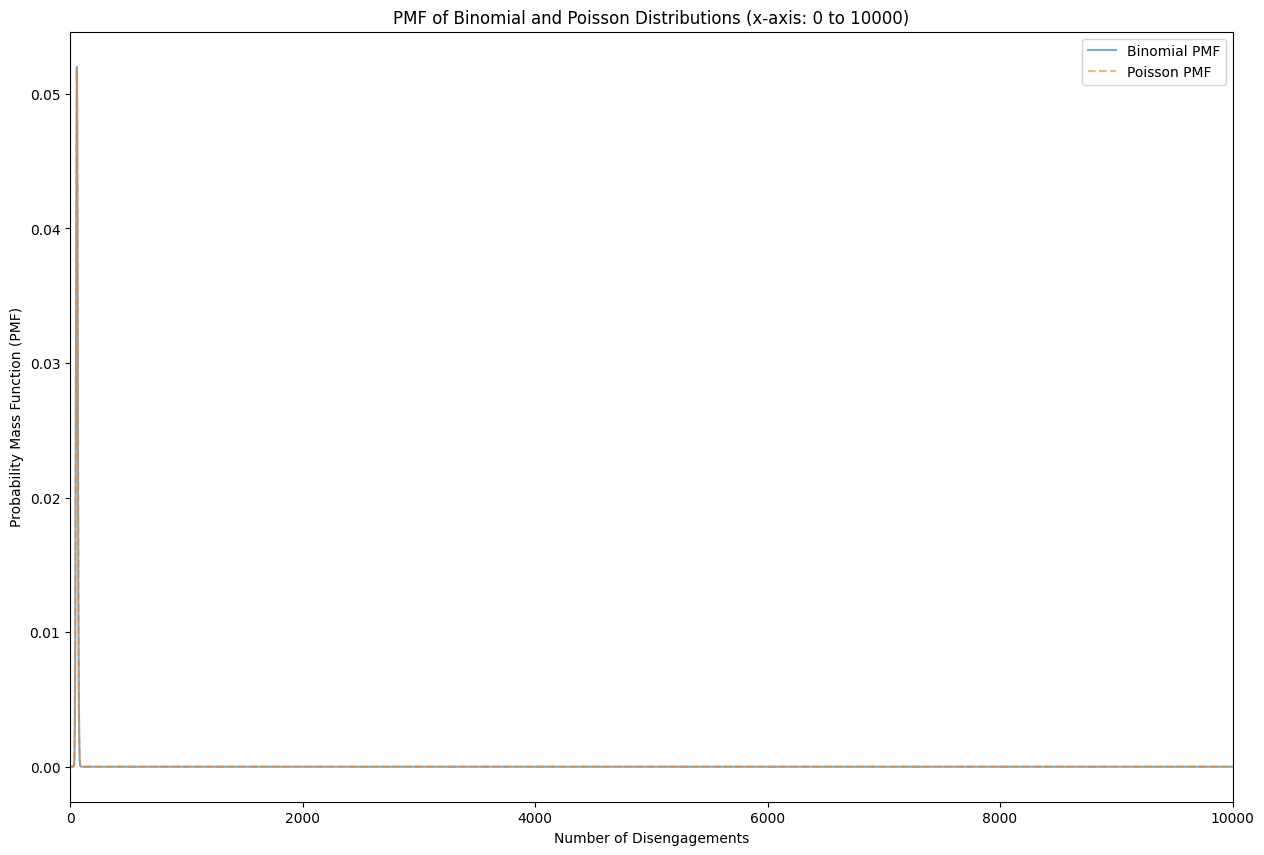

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(x, binom_pmf, label='Binomial PMF', alpha=0.6)
plt.plot(x, poisson_pmf, label='Poisson PMF', linestyle='dashed', alpha=0.6)
plt.title('PMF of Binomial and Poisson Distributions (x-axis: 0 to 10000)')
plt.xlabel('Number of Disengagements')
plt.ylabel('Probability Mass Function (PMF)')
plt.legend()
plt.xlim(0, 10000)
plt.show()

(2)The x-axis ranging between 0 and 100

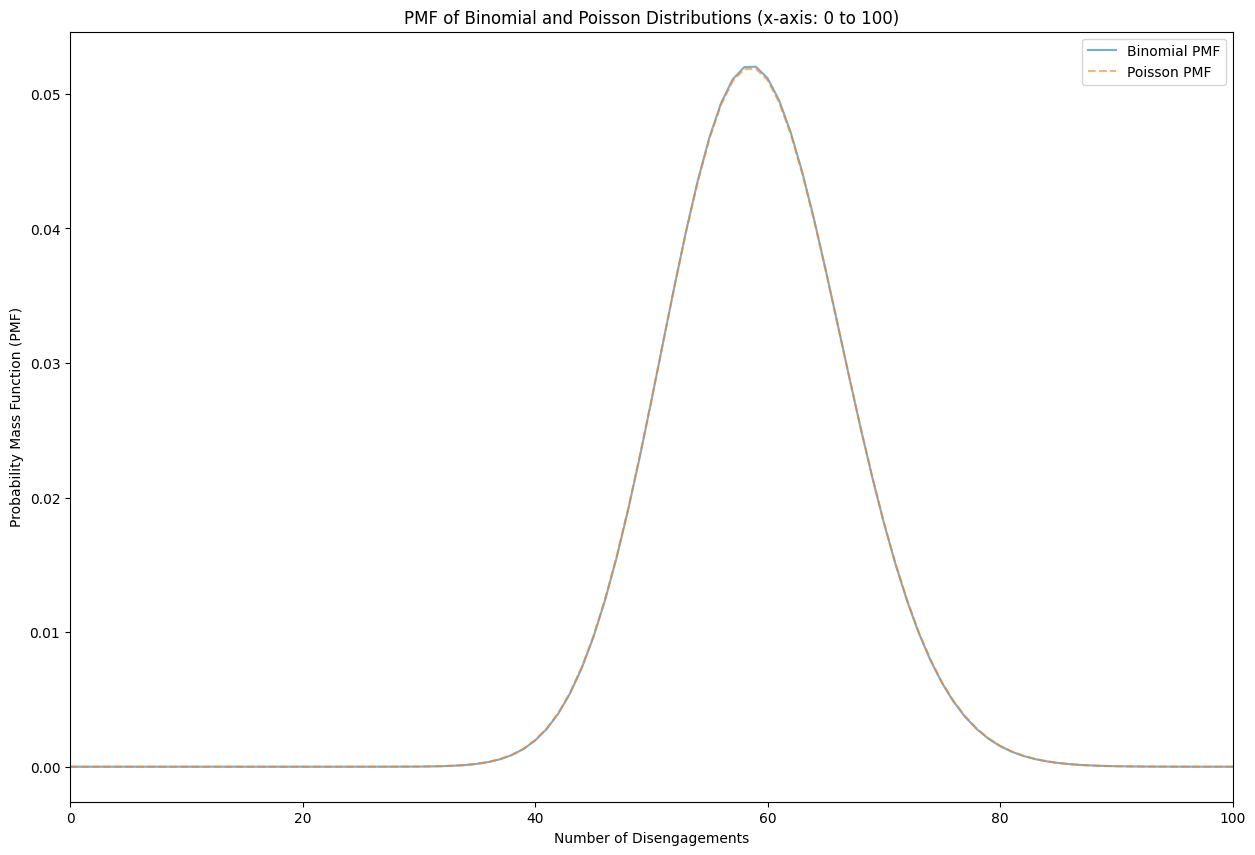

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(x, binom_pmf, label='Binomial PMF', alpha=0.6)
plt.plot(x, poisson_pmf, label='Poisson PMF', linestyle='dashed', alpha=0.6)
plt.title('PMF of Binomial and Poisson Distributions (x-axis: 0 to 100)')
plt.xlabel('Number of Disengagements')
plt.ylabel('Probability Mass Function (PMF)')
plt.legend()
plt.xlim(0, 100)
plt.show()

We find that the curves of pmf of Binomial distribution and poisson distributions in the second plot are overlapped, which confirms that the Poisson approximation is correct (What we suggested in Task 3.2.c) when the number of trials is large and the probability of success per trial is small. 

Also, the peak of both distributions around the mean (approximately 59) indicates that this is the most likely number of disengagements over 10000 miles in cloudy conditions.

#### e. Solve Task 3.1.e (How likely is it that there are 100 or more disengagements in 10,000 miles  under cloudy conditions? (hint: use Central Limit Theorem)) by using the cumulative distribution function (CDF) of the distribution you computed in Task 3.2.c and compare the results. Discuss your findings.

In [14]:
lambda_poisson = 10000 * prob_disengage_cloudy

prob_100_more_disengage_cloudy_poisson = 1 - stats.poisson.cdf(100, lambda_poisson)
print(f"The likelihood (using CDF of Poisson distribution) of having 100 or more disengagements in 10000 miles under cloudy conditions is: {prob_100_more_disengage_cloudy_poisson}")

The likelihood (using CDF of Poisson distribution) of having 100 or more disengagements in 10000 miles under cloudy conditions is: 4.308829278931725e-07


Both methods yield very low probabilities, indicating that having 100 or more disengagements in 10,000 miles is extremely unlikely.

### 3.3 Reaction Time Analysis

#### a. Greater than 0.4s given that the weather was cloudy? Reaction time is measured only in cases where there was an automatic disengagement.

In [15]:
df_cloudy_auto = df[(df['Weather'] == 'cloudy') & (df['TypeOfTrigger'] == 'automatic')]

# Calculate the reaction time larger than 0.4
count = df_cloudy_auto[df_cloudy_auto['ReactionTime'] > 0.4].shape[0]

total_count = df_cloudy_auto.shape[0]
prob = count/total_count
print(f"The probability of disengagement when the reaction time is greater than 0.4 seconds on cloudy days is: {prob:.5f}")

The probability of disengagement when the reaction time is greater than 0.4 seconds on cloudy days is: 0.61209


According to the result, the conditional probability of reaction time greater than 0.4s given that the weather was cloudy is 0.61209

#### b. Greater than 0.7s given that the weather was clear? Reaction time is measured only in cases where there was an automatic disengagement.

In [16]:
df_clear_auto = df[(df['Weather'] == 'clear') & (df['TypeOfTrigger'] == 'automatic')]

# Calculate the reaction time larger than 0.7
count = df_clear_auto[df_clear_auto['ReactionTime'] > 0.7].shape[0]

total_count = df_clear_auto.shape[0]
prob = count/total_count
print(f"The probability of disengagement when the reaction time is greater than 0.7 seconds on clear days is: {prob:.5f}")

The probability of disengagement when the reaction time is greater than 0.7 seconds on clear days is: 0.38542


According to the result, the conditional probability of reaction time greater than 0.7s given that the weather was clear is 0.38542

### 3.4 A study found that an automatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.4s under cloudy conditions and, (ii) a reaction time greater than 0.7s under clear conditions. Find the probability of an accident per mile due to automatic AV disengagement and slow reaction

According to the Task.3.1.d and Task.3.3, we get the following results:

- prob_disengage_cloudy_auto = 0.00281

- prob_disengage_clear_auto = 0.00026

- prob_slow_cloudy = 0.612

- prob_slow_clear = 0.385

- prob_cloudy = 0.28

- prob_clear =  0.72


We will use these data to find the probability of an accident per mile due to automatic AV disengagement and slow reaction

In [17]:
prob_disengage_cloudy_auto = 0.00281
prob_disengage_clear_auto = 0.00026
prob_slow_cloudy = 0.612
prob_slow_clear = 0.385


prob_accident_per_mile_cloudy = prob_disengage_cloudy_auto * prob_slow_cloudy 
prob_accident_per_mile_clear = prob_disengage_clear_auto * prob_slow_clear

prob_accident_per_mile = (prob_accident_per_mile_cloudy * 0.28) + (prob_accident_per_mile_clear * 0.72)
prob_accident_per_mile

0.0005535936

### 3.5 Next, you will investigate how to diagnose the cause of an AV disengagement based on new observations

#### a. An AV had a disengagement with a reaction time greater than 0.4s on a cloudy day. What is the posterior probability that the root cause of the disengagement was “Software Froze”?

By the Bayes' Theorem:

$P(\text{Software Froze | Reaction Time > 0.4s and Cloudy}) = \frac{P(\text{Reaction Time > 0.4s and Cloudy | Software Froze}) \cdot P(\text{Software Froze})}{P(\text{Reaction Time > 0.4s and Cloudy})}$

In [18]:
df_auto_disengage = df[df['TypeOfTrigger'] == 'automatic'] 

P_softwareforze = df_auto_disengage[df_auto_disengage['Cause'] == 'Software Froze'].shape[0] / df_auto_disengage.shape[0]

df_auto_disengage_cloudy_softwarefroze = df_auto_disengage[(df_auto_disengage['Weather'] == 'cloudy') & (df_auto_disengage['Cause'] == 'Software Froze')]

P_reaction_gt_04_cloudy_softwareforze = df_auto_disengage_cloudy_softwarefroze[df_auto_disengage_cloudy_softwarefroze['ReactionTime'] > 0.4].shape[0] / df_auto_disengage_cloudy_softwarefroze.shape[0]

P_reation_gt_04_cloudy = df_auto_disengage[(df_auto_disengage['Weather'] == 'cloudy') & (df_auto_disengage['ReactionTime'] > 0.4)].shape[0] / df_auto_disengage[df_auto_disengage['Weather'] == 'cloudy'].shape[0]

P_softwareforze_reaction_gt_04_cloudy = P_reaction_gt_04_cloudy_softwareforze * P_softwareforze / P_reation_gt_04_cloudy
print(f"The probability that the cause of disengagement is software frozed given that the reaction time is greater than 0.4 seconds on a cloudy day is: {P_softwareforze_reaction_gt_04_cloudy:.5f}")

The probability that the cause of disengagement is software frozed given that the reaction time is greater than 0.4 seconds on a cloudy day is: 0.11110


#### b. What is the posterior probability that the root cause of the disengagement was “Software Froze" if the disengagement happened on a clear day with reaction time greater than 0.7s. Based on the probabilities calculated in Tasks 3.5.a and 3.5.b, discuss your findings. 

By the Bayes' Theorem:

$P(\text{Software Froze | Reaction Time > 0.7s and Clear}) = \frac{P(\text{Reaction Time > 0.7s and Clear | Software Froze}) \cdot P(\text{Software Froze})}{P(\text{Reaction Time > 0.7s and Clear})}$

In [19]:
df_auto_disengage = df[df['TypeOfTrigger'] == 'automatic']

P_softwareforze = df_auto_disengage[df_auto_disengage['Cause'] == 'Software Froze'].shape[0] / df_auto_disengage.shape[0]

df_auto_disengage_clear_softwarefroze = df_auto_disengage[(df_auto_disengage['Weather'] == 'clear') & (df_auto_disengage['Cause'] == 'Software Froze')]

P_reaction_gt_07_clear_softwareforze = df_auto_disengage_clear_softwarefroze[df_auto_disengage_clear_softwarefroze['ReactionTime'] > 0.7].shape[0] / df_auto_disengage_clear_softwarefroze.shape[0]

P_reation_gt_07_clear = df_auto_disengage[(df_auto_disengage['Weather'] == 'clear') & (df_auto_disengage['ReactionTime'] > 0.7)].shape[0] / df_auto_disengage[df_auto_disengage['Weather'] == 'clear'].shape[0]

P_softwareforze_reaction_gt_07_clear = P_reaction_gt_07_clear_softwareforze * P_softwareforze / P_reation_gt_07_clear
print(f"The probability that the cause of disengagement is software frozed given that the reaction time is greater than 0.7 seconds on a clear day is: {P_softwareforze_reaction_gt_07_clear:.5f}")

The probability that the cause of disengagement is software frozed given that the reaction time is greater than 0.7 seconds on a clear day is: 0.07736


For a cloudy day with reaction time > 0.4s, the posterior probability that the cause was "Software Froze" was about 11.11%. However, a clear day with reaction time > 0.7s, this probability is lower at 7.74%. This suggests that "Software Froze" is relatively more likely to be the cause of disengagements under cloudy conditions than under clear conditions, even when accounting for longer reaction times.

### 6. In this question, you will construct a Naive Bayes model to infer the root cause of disengagement scenarios of AVs. Naive Bayes assumes that the factors are class conditionally independent. We assume that both Location (urban-street or highway) and Weather (cloudy or clear) are factors related to the Cause (consider the Cause has 3 different values, “Software Froze”, “Hardware Fault” or “Other”), and Location and Weather are independent given the Cause. Answer the following questions:

#### a. Draw a graph for the Naive Bayes model described in the question.

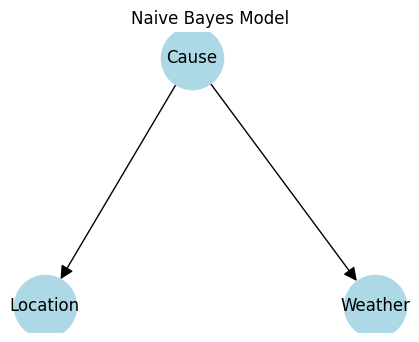

In [20]:
G = nx.DiGraph()

# Define states and transitions
edges = [('Cause', 'Location', ''), 
         ('Cause', 'Weather', '')]
# Add edges to the graph
for src, dest, label in edges:
    G.add_edge(src, dest, label=label)

# Set positions for the graph nodes
pos = {
    'Cause': (5, 10),
    'Location': (1, 5),
    'Weather': (10, 5)
}

# Draw the graph
plt.figure(figsize=(4,3))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', arrowsize=20)

# Draw edge labels
edge_labels = {(src, dest): label for src, dest, label in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Naive Bayes Model')
plt.show()

#### b. Count the number of parameters needed to define the Naive Bayes model (including the prior and the conditional probability distributions).

##### (1) Prior Probabilities for the Cause

Cause has 3 different values: "Software Froze", "Hardware Fault" and "Other"

So the probabilities are P(Cause = Software Froze), P(Cause = Hardware Fault), P(Cause = Other)

Since P(Software Froze) + P(Hardware Fault) + P(Other) = 1, so we need 2 parameters to define these priors.

##### (2) Conditional Probabilities for Location given Cause

Location has 2 different values: "urban-street" and "highway"

So the probabilities are P(Location = urban-street ∣ Cause = c),P(Location = highway ∣ Cause = c)

Therefore, we need 1 parameter for P(Location = urban-street ∣ Cause = Hardware Fault)

1 parameter for P(Location = urban-street ∣ Cause = Software Froze)

1 parameter for P(Location = urban-street ∣ Cause = Other)

Since the probability P(Location = highway ∣ Cause = c) is depend on the probability P(Location = urban-street ∣ Cause = c), so we need 3 parameters.

##### (3) Conditional Probabilities for Weather given Cause

Weather has 2 different values: "cloudy" and "clear"

So the probabilities are P(Weather = cloudy ∣ Cause = c),P(Weather = clear ∣ Cause = c)

Therefore, we need 1 parameter for P(Weather = cloudy ∣ Cause = Hardware Fault)

1 parameter for P(Weather = cloudy ∣ Cause = Software Froze)

1 parameter for P(Weather = cloudy ∣ Cause = Other)

Since the probability P(Weather = cloudy ∣ Cause = c) is depend on the probability P(Weather = clear ∣ Cause = c), so we need 3 parameters.

**Above all, we totally need 2 + 3 + 3 = 8 parameters.**

#### c. Based on the number of parameters needed, derive, and show the conditional probability tables and prior probability from the given dataset to infer the Cause.

For Prior Probabilities:

In [21]:
df['Cause'] = df['Cause'].apply(lambda x: x if x in ['Software Froze', 'Hardware Fault'] else 'Other')
cause = df['Cause'].unique().tolist()
counts = df['Cause'].value_counts().tolist()
prob = [count/df.shape[0] for count in counts]

prior_probabilities = pd.DataFrame({
    'Cause': cause,
    '#': counts,
    'P(Cause)': prob
})

prior_probabilities

,Cause,#,P(Cause)
0,Other,822,0.802734
1,Software Froze,104,0.101562
2,Hardware Fault,98,0.095703


For the conditional probability P(Location|cause):

In [22]:
df_location_cause_counts = df.groupby(['Location', 'Cause']).size().reset_index(name='#')

total_counts_per_cause = df['Cause'].value_counts()
df_location_cause_counts['P(Location | Cause)'] = df_location_cause_counts.apply(
    lambda row: row['#'] / total_counts_per_cause[row['Cause']], axis=1
)
df_location_cause_counts

,Location,Cause,#,P(Location | Cause)
0,highway,Hardware Fault,9,0.086538
1,highway,Other,5,0.006083
2,highway,Software Froze,6,0.061224
3,urban-street,Hardware Fault,95,0.913462
4,urban-street,Other,817,0.993917
5,urban-street,Software Froze,92,0.938776


For the conditional probability P(Location|cause):

In [23]:
df_weather_cause_counts = df.groupby(['Weather', 'Cause']).size().reset_index(name='#')

total_counts_per_cause = df['Cause'].value_counts()
df_weather_cause_counts['P( Weather | Cause)'] = df_weather_cause_counts.apply(
    lambda row: row['#'] / total_counts_per_cause[row['Cause']], axis=1
)
df_weather_cause_counts

,Weather,Cause,#,P( Weather | Cause)
0,clear,Hardware Fault,58,0.557692
1,clear,Other,71,0.086375
2,clear,Software Froze,60,0.612245
3,cloudy,Hardware Fault,46,0.442308
4,cloudy,Other,751,0.913625
5,cloudy,Software Froze,38,0.387755


#### d. According to the conditional probability tables you derived, what is the most probable root cause of disengagement given the Weather was cloudy and the Location was urban-street.

By Baye's Theorem:

$P(Cause|Weather, Location) \propto P(Cause) P(Weather|Cause) P(Location|Cause)$

Given the weather is cloudy and location is urban-street:

- For Cause is Hardware Fault:

$P(HF|cloudy, u-s) \propto P(HF) P(cloudy|HF) P(u-s|HF) = 0.096 \cdot 0.442 \cdot 0.913 \approx 0.0387$

- For Cause is Software Froze:

$P(SF|cloudy, u-s) \propto P(SF) P(cloudy|SF) P(u-s|SF) = 0.102 \cdot 0.388 \cdot 0.94 \approx 0.0372$

- For Cause is Other:

$P(Other|cloudy, u-s) \propto P(Other) P(cloudy|Other) P(u-s|Other) = 0.803 \cdot 0.914 \cdot 0.994 \approx 0.73$

Therefore, the most probable root cause of disengagement given that the Weather was "cloudy" and the Location was "urban-street" is "Other," since it has the highest probability.